In [102]:
import os
import tempfile
import numpy as np
import pandas as pd

import pandapower as pp
import pandapower.networks as pn
import pandapower.plotting as plot
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [103]:
# big boy function

def imp_data(file_name):
    # import data location
    folder_path = '..\\data\\'
    file_path = folder_path + file_name

    # read file to a data frame
    df = pd.read_csv(file_path, low_memory = False)
    return df


def data_process(df, keep_cols):
    # Process df inplace
    col_names = df.columns.tolist()
    for col in keep_cols:
        col_names.remove(col)
    
    df.drop(columns=col_names, inplace = True)
    df.dropna(inplace=True)
    df.rename(columns = {'cet_cest_timestamp':'date_time'}, inplace = True)
    df.set_index('date_time')
   

def df_split(df, chunk_size):
    # splits the dataframe into smaller dataframes
    # saves the output to list
    dfList = []
    for i in range(0, df.shape[0], chunk_size):
        dfList.append(df[i:i+chunk_size])
    
    print('Number of data frame segments = ', len(dfList))
    return dfList


def parse_date(df):
    # parse dates for date_time column
    df['date_time'] = pd.to_datetime(df['date_time'], exact=True, cache=True, format='%Y-%m-%d %H:%M:%S', dayfirst=True)


def time_diff(df, time_start, time_end):
    # apply time mask to dataframe by index
    # take the difference between rows
    ts = df.set_index('date_time')
    ts_sel = ts.between_time(time_start, time_end)

    return ts_sel


def unique_date(df):
    # find unique days in the time-series index df
    
    return df.index.map(lambda t: str(t.date())).unique().tolist()


def night_plot(df, date):
    # basic plot function
    df_diff = df.diff() # convert columns to row differences
    df_diff.drop(str(df_diff.index[0]), inplace=True) # drop first NaN row
    
    return df_diff.loc[date].plot(figsize = (10, 5))

In [104]:
# entire data set processing
# --------------------------

df_imp = imp_data("house_data.csv")

keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'cet_cest_timestamp']
data_process(df_imp, keep_cols)

chunk_size = 10000
dfList = df_split(df_imp, chunk_size)

Number of data frame segments =  90


In [184]:
def night_data(df, evening_date, start_time, end_time):

    # get the dates for loc slice
    start = evening_date + ' ' + start_time
    foo = pd.to_datetime(evening_date)
    bar = foo.replace(hour=int(end_time[0:2]), minute=int(end_time[3:5]), second=int(end_time[6:8])).strftime('%H:%M:%S')
    end = str(foo + timedelta(days=1))[:11] + bar
    print(start)
    print(end)

    parse_date(df)
    ts = df.set_index('date_time')
    return ts.loc[start : end]


unique_date(dfList[1])

# night_data(dfList[1], '2015-05-28', '20:00:00', '08:00:00')


AttributeError: 'int' object has no attribute 'date'

<AxesSubplot:xlabel='date_time'>

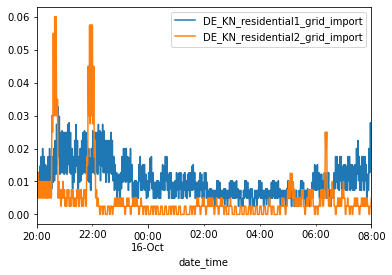

In [120]:
df = dfList[21]
parse_date(df)
ts = df.set_index('date_time')
foo = ts.loc['2015-10-15 20:00:00':'2015-10-16 08:00:00']

foo.diff().plot()
# unique_date(ts)

['2015-10-14', '2015-10-15', '2015-10-16', '2015-10-17', '2015-10-18', '2015-10-19', '2015-10-20', '2015-10-21']


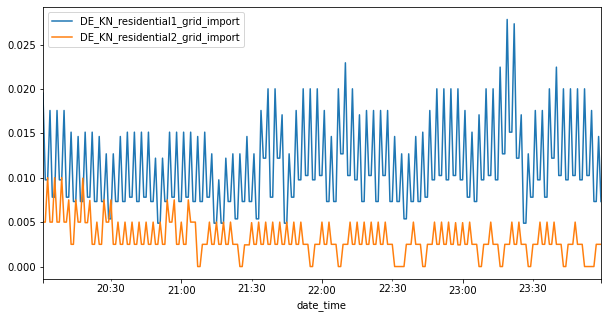

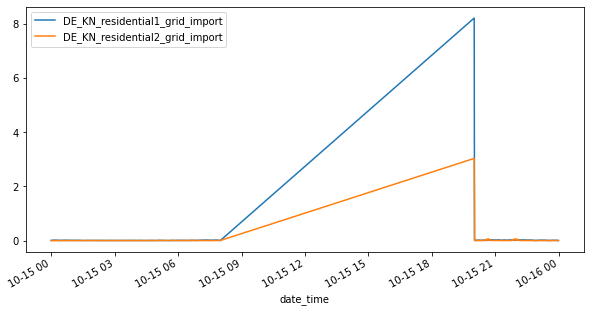

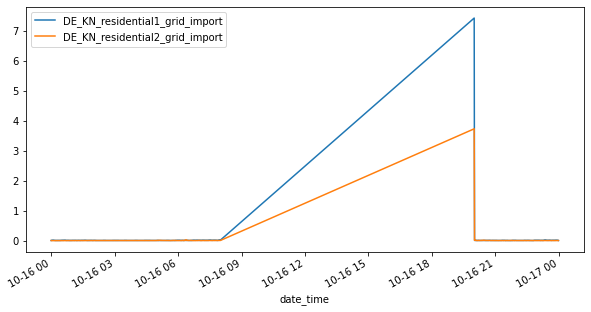

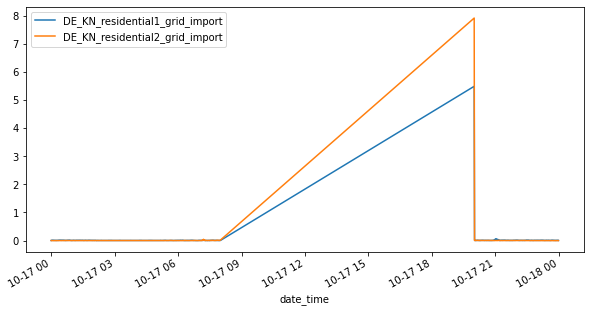

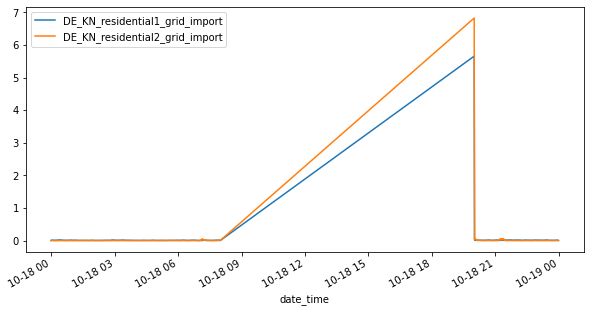

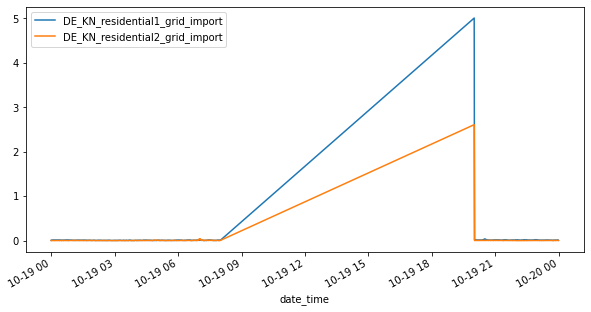

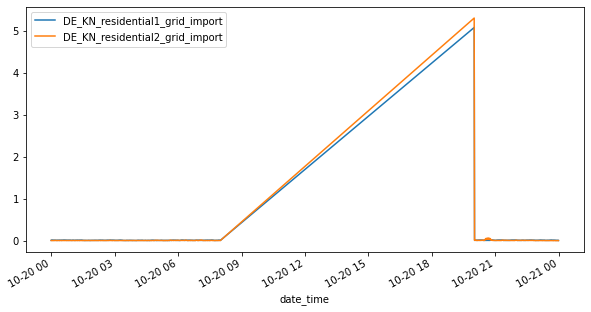

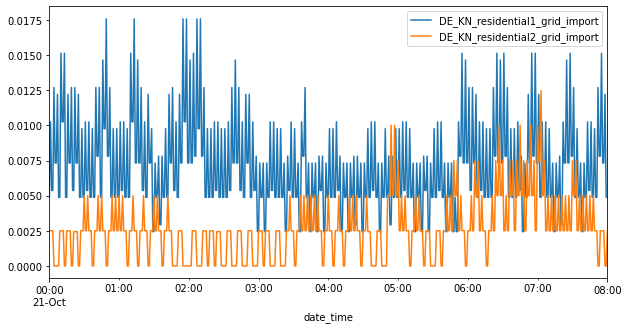

In [107]:
# select data set processing
# ---------------------------

df = dfList[21]
parse_date(df)

ts_night = time_diff(df, '20:00:00', '08:00:00')

night_dates = unique_date(ts_night)
print(night_dates)
# night_plot(ts_night, night_dates[2])

for i in night_dates:
    night_plot(ts_night, i)

In [108]:
big=ts_night.loc[night_dates[5]]
 
# Convert entire data frame as markdown and print
print(big.to_markdown())

| date_time                 |   DE_KN_residential1_grid_import |   DE_KN_residential2_grid_import |
|:--------------------------|---------------------------------:|---------------------------------:|
| 2015-10-19 00:00:00+02:00 |                          1837.62 |                          985.182 |
| 2015-10-19 00:01:00+02:00 |                          1837.63 |                          985.182 |
| 2015-10-19 00:02:00+02:00 |                          1837.64 |                          985.182 |
| 2015-10-19 00:03:00+02:00 |                          1837.65 |                          985.185 |
| 2015-10-19 00:04:00+02:00 |                          1837.66 |                          985.187 |
| 2015-10-19 00:05:00+02:00 |                          1837.67 |                          985.19  |
| 2015-10-19 00:06:00+02:00 |                          1837.67 |                          985.192 |
| 2015-10-19 00:07:00+02:00 |                          1837.69 |                          985.192 |
